### Imports

In [8]:
"""
GradientBoostingClassifier Boosting Algorithm
"""
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from plots import plot_confusion_matrix_general
import pandas as pd
from sklearn.model_selection import train_test_split

### Train model function

In [9]:
def trainModel(X_train, y_train):
    rf = GradientBoostingClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    return rf

### Predict model function

In [10]:
def predictModel(model, X_test):
    return model.predict(X_test)

### Evalutate model function

In [11]:
def evaluateModel(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, class_report

### Display metrics function

In [12]:
def displayMetrics(y_test, y_pred, accuracy, precision, recall, f1, class_report):
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix: ",confusion_matrix(y_test, y_pred))
    plot_confusion_matrix_general(y_test, y_pred, ['1', '2'])

### GradientBoostingClassifier function

In [13]:
def gradientBoostingClassifier():
    apples = pd.read_csv('../datasets/apple_quality_labels.csv')

    label_encoder = LabelEncoder()
    apples['Quality'] = label_encoder.fit_transform(apples['Quality'])

    X = apples.drop(columns=['Quality'])
    y = apples['Quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    model = trainModel(X_train, y_train)
    y_pred = predictModel(model, X_test)
    accuracy, precision, recall, f1, class_report = evaluateModel(y_test, y_pred)
    displayMetrics(y_test, y_pred, accuracy, precision, recall, f1, class_report)

### Start algorithm

Accuracy:  0.87
Precision:  0.87
Recall:  0.87
F1 Score:  0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       401
           1       0.87      0.87      0.87       399

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800


Confusion Matrix:  [[349  52]
 [ 52 347]]


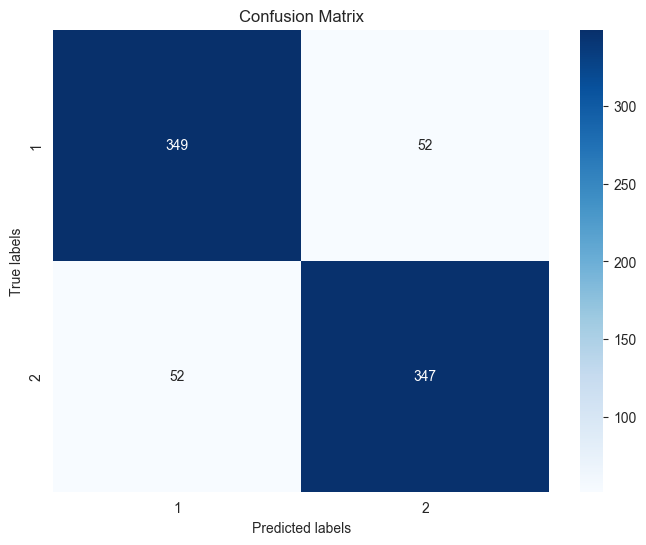

In [14]:
gradientBoostingClassifier()